## Heart Disease Prediction

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import train_test_split
from sklearn.model_selection import train_test_split
#To scale the features, import StandardScaler
from sklearn.preprocessing import StandardScaler

In [3]:
#import Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
dataset = pd.read_csv('dataset.csv')

In [8]:
dataset.shape

(303, 14)

In [9]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
dataset.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

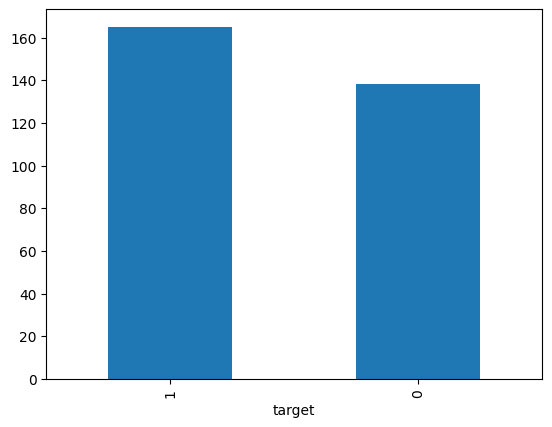

In [11]:
dataset.target.value_counts().plot(kind='bar')

## Heart Disease Frequency according to Gender

Let's compare our target column with the sex column.

In [13]:
dataset.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [14]:
# Compare target column with sex column
pd.crosstab(dataset.target, dataset.sex)

sex,0,1
target,,
0,24,114
1,72,93


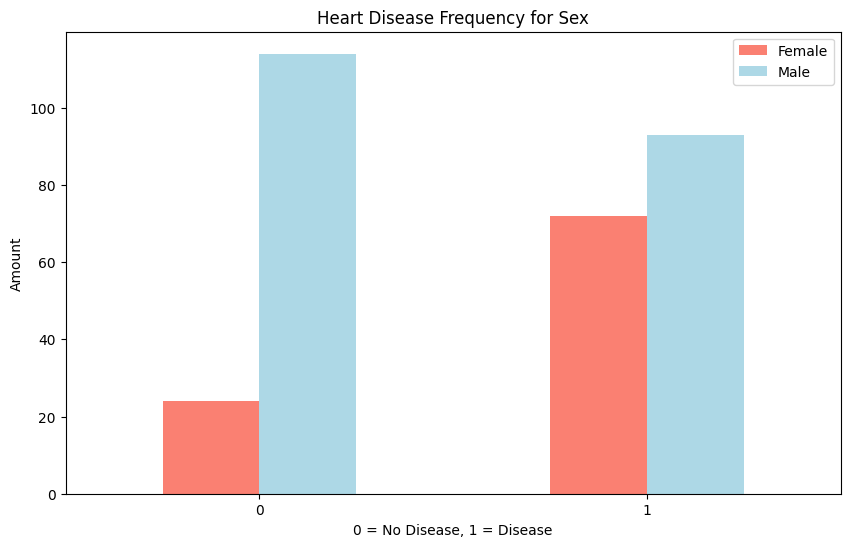

In [16]:
# Create a plot
pd.crosstab(dataset.target, dataset.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);
# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

## Age vs Max Heart rate for Heart Disease

Let's try combining a couple of independent variables, such as, age and thalach (maximum heart rate) and then comparing them to our target variable heart disease.

Because there are so many different values for age and thalach, we'll use a scatter plot.

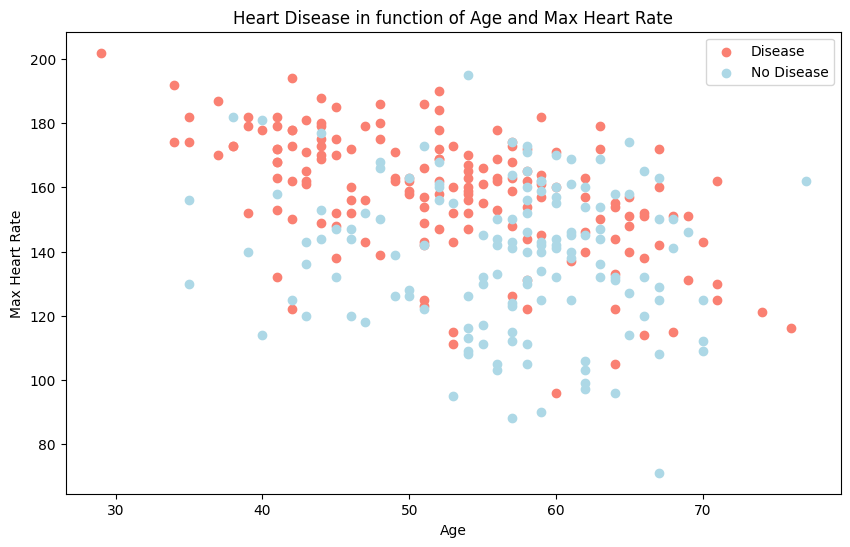

In [17]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(dataset.age[dataset.target==1], 
            dataset.thalach[dataset.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(dataset.age[dataset.target==0], 
            dataset.thalach[dataset.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

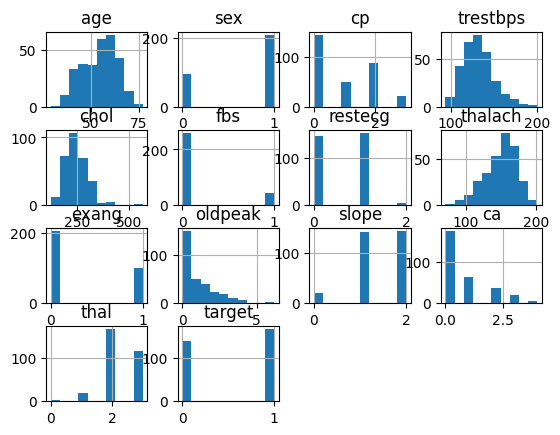

In [21]:
# Histograms are a great way to check the distribution of a variable
dataset.hist();

## Heart Disease Frequency per Chest Pain Type

In [22]:
pd.crosstab(dataset.cp, dataset.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


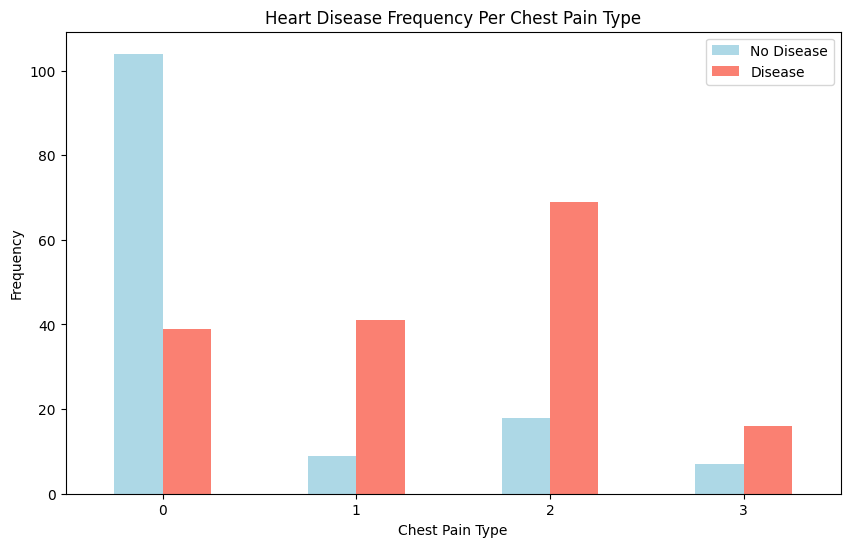

In [23]:
# Create a new crosstab and base plot
pd.crosstab(dataset.cp, dataset.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

## Data Processing

 converting some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variable

In [24]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

Now, I will use the StandardScaler from sklearn to scale my dataset.

In [25]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

split our dataset into training and testing datasets.

In [26]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

## K Neighbors Classifier

The classification score varies based on different values of neighbors that we choose. Thus, I'll plot a score graph for different values of K (neighbors) and check when do I achieve the best score.

In [27]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

I have the scores for different neighbor values in the array knn_scores. I'll now plot it and see for which value of K did I get the best scores.

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

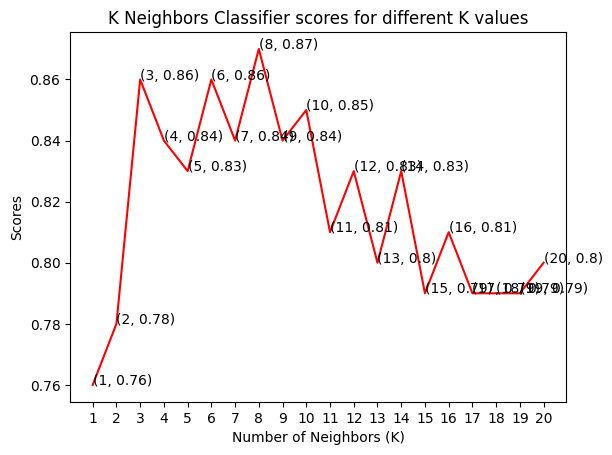

In [28]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

From the plot above, it is clear that the maximum score achieved was 0.87 for the 8 neighbors.

In [29]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))

The score for K Neighbors Classifier is 87.0% with 8 nieghbors.


## Support Vector Classifier

There are several kernels for Support Vector Classifier. I'll test some of them and check which has the best score.

In [30]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

I'll now plot a bar plot of scores for each kernel and see which performed the best.

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

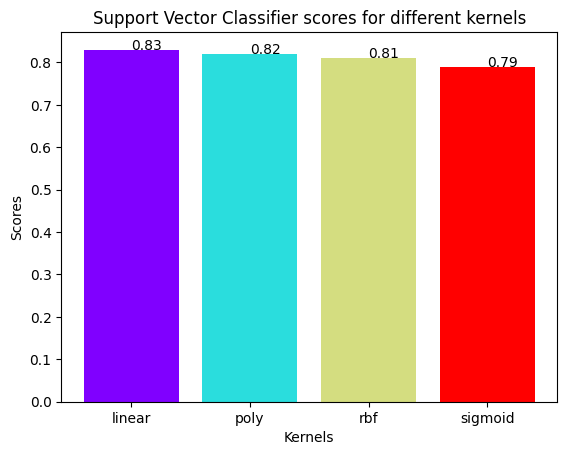

In [31]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

The linear kernel performed the best, being slightly better than rbf kernel.

In [32]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 83.0% with linear kernel.


## Decision Tree Classifier

Here, I'll use the Decision Tree Classifier to model the problem at hand. I'll vary between a set of max_features and see which returns the best accuracy.

In [33]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

I selected the maximum number of features from 1 to 30 for split. Now, let's see the scores for each of those cases.

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

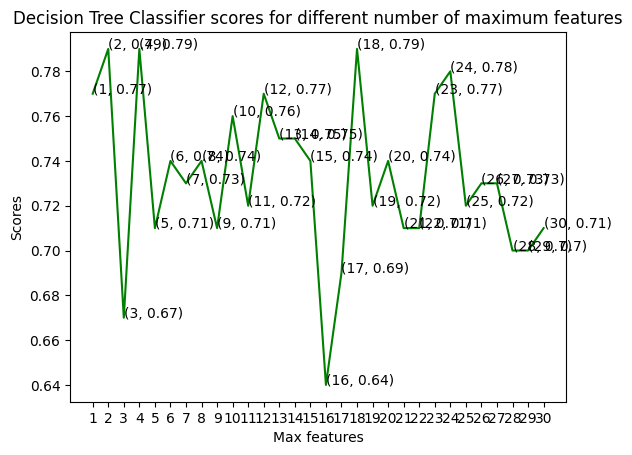

In [34]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

The model achieved the best accuracy at three values of maximum features, 2, 4 and 18.

In [36]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17]*100, [2,4,18]))

The score for Decision Tree Classifier is 79.0% with [2, 4, 18] maximum features.


## Random Forest Classifier

Now, I'll use the ensemble method, Random Forest Classifier, to create the model and vary the number of estimators to see their effect.

In [37]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

The model is trained and the scores are recorded. Let's plot a bar plot to compare the scores.

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

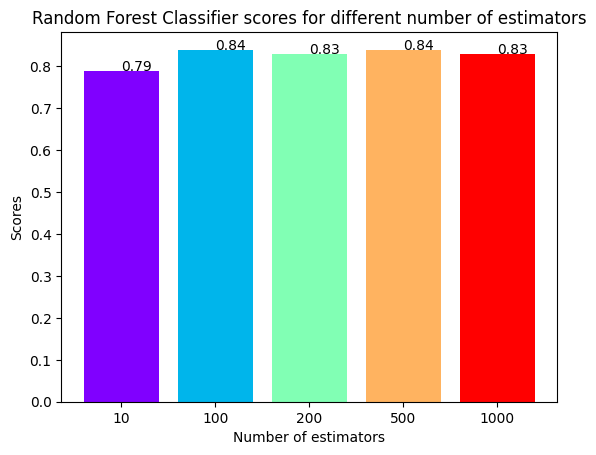

In [38]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

The maximum score is achieved when the total estimators are 100 or 500.

In [39]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))

The score for Random Forest Classifier is 84.0% with [100, 500] estimators.


I varied parameters across each model to improve their scores. In the end, K Neighbors Classifier achieved the highest score of 87% with 8 nearest neighbors.

In [41]:
#Make predictions
y_preds=knn_classifier.predict(X_test)
y_preds

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [43]:
classification_report(y_test,y_preds)

'              precision    recall  f1-score   support\n\n           0       0.83      0.73      0.78        48\n           1       0.78      0.87      0.82        52\n\n    accuracy                           0.80       100\n   macro avg       0.80      0.80      0.80       100\nweighted avg       0.80      0.80      0.80       100\n'

In [44]:
confusion_matrix(y_test,y_preds)

array([[35, 13],
       [ 7, 45]], dtype=int64)

In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score=cross_val_score(knn_classifier,X,y,cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.80327869, 0.86666667, 0.78333333])

In [46]:
np.mean(cross_val_score)

0.8349180327868853